# Priority Queues

## Agenda

1. Motives
2. Naive implementation
2. Heaps
    - Mechanics
    - Implementation
    - Run-time Analysis
3. Heapsort

## 1. Motives

## 2. Naive implementation

In [37]:
class PriorityQueue:
    def __init__(self):
        self.data = []
        
    def add(self, x): #O(N)
        for i in range(len(self.data)):
            if x > self.data[i]:
                self.data.insert(i, x)
                break
        else:
            self.data.append(x)
    
    def max(self): #O(1)
        return self.data[0]

    def pop_max(self): #O(N) because everything needs to be shifted down when deleted
        return self.data.pop(0)
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [38]:
pq = PriorityQueue()

In [39]:
import random
for _ in range(10):
    pq.add(random.randrange(100))

In [40]:
pq

[96, 46, 35, 30, 28, 27, 26, 20, 18, 4]

In [41]:
while pq:
    print(pq.pop_max())

96
46
35
30
28
27
26
20
18
4


## 3. Heaps

### Mechanics

### Implementation

In [42]:
class Heap:
    def __init__(self):
        self.data = []
    
    @staticmethod
    def _parent(i):
        return (i-1)//2
    
    @staticmethod
    def _left(i):
        return 2*i+1
    
    @staticmethod
    def _right(i):
        return 2*i+2
    
    def add(self, x): #O(log_2 N) aka O(log N)
        self.data.append(x)
        idx = len(self.data)-1
        pidx = self._parent(idx)
        while pidx >= 0 and self.data[idx] > self.data[pidx]:
            self.data[idx], self.data[pidx] = self.data[pidx], self.data[idx]
            idx = pidx
            pidx = self._parent(idx)
    
    def max(self): #O(1)
        assert self.data
        return self.data[0]
    
    def _heapify(self): #O(log N)
        idx = 0
        lidx = self._left(idx)
        ridx = self._right(idx)
        while idx < len(self.data):
            maxidx = idx
            if lidx < len(self.data) and self.data[lidx] > self.data[maxidx]:
                maxidx = lidx
            if ridx < len(self.data) and self.data[ridx] > self.data[maxidx]:
                maxidx = ridx
            #now maxidx contains the idx of the max element between idx, lidx, and ridx
            if maxidx != idx:
                self.data[idx], self.data[maxidx] = self.data[maxidx], self.data[idx]
                idx = maxidx
                lidx = self._left(idx)
                ridx = self._right(idx)
            else:
                break

    def pop_max(self): #O(log N): due to heapify
        assert self.data
        rv = self.data[0]
        self.data[0] = self.data[-1]
        del self.data[len(self.data)-1] #O(1) time
        #now push new val at root down to its correct pos (heapification)
        self._heapify()
        return rv
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [43]:
h = Heap()

In [44]:
import random
for _ in range(10):
    h.add(random.randrange(100))

In [45]:
h

[91, 85, 80, 74, 83, 12, 70, 60, 55, 31]

In [46]:
h.add(3)
h

[91, 85, 80, 74, 83, 12, 70, 60, 55, 31, 3]

In [47]:
while h:
    print(h.pop_max())

91
85
83
80
74
70
60
55
31
12
3


### Run-time Analysis

## 4. Heapsort

In [54]:
def heapsort(iterable): #O(N logN)
    heap = Heap()
    for x in iterable:
        heap.add(x)
    lst = []
    while heap:
        lst.append(heap.pop_max())
    lst.reverse()
    return lst

In [55]:
heapsort(random.randrange(100) for _ in range(15))

[7, 21, 26, 28, 35, 42, 51, 52, 54, 57, 60, 69, 81, 95, 98]

In [56]:
import random

def pairs(iterable):
    it = iter(iterable)
    a = next(it)
    while True:
        b = next(it)
        yield a,b
        a = b

lst = heapsort(random.random() for _ in range(1000))
all((a <= b) for a, b in pairs(lst))

C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: generator 'pairs' raised StopIteration
  if sys.path[0] == '':


True

In [57]:
import timeit
def time_heapsort(n):
    return timeit.timeit('heapsort(rlst)',
                         'from __main__ import heapsort; '
                         'import random; '
                         'rlst = (random.random() for _ in range({}))'.format(n),
                         number=1000)

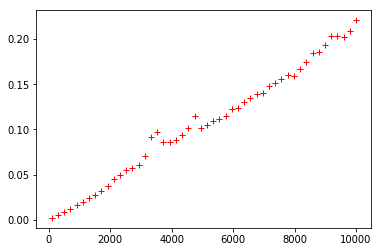

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.show()

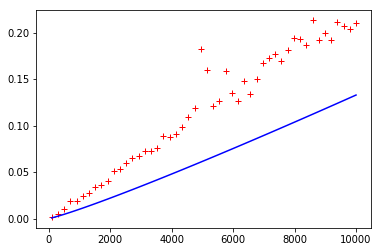

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.plot(ns, ns*np.log2(ns)*0.01/10000, 'b') # O(n log n) plot
plt.show()